In [1]:
import os
import sys
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import random
import matplotlib.colors as mcolors


In [2]:
print(plt.style.available)
plt.style.use('seaborn-v0_8-dark-palette')


['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


In [3]:
def read_lines(file):
    with open(file, 'r') as fin:
        lines = fin.readlines()
    lines = [line.strip() for line in lines]
    return lines

def get_index_of(x, list):
    ret = -1
    for index, elem in enumerate(list):
        if x == elem:
            ret = index
    return ret

In [4]:
def plot_file(file,
              sep=',', 
              x='x', 
              ys=['y'], 
              labels=['E_DNA', 'E_Ideal'],
              xlabel='Time (hours)',
              ylabel='Concentration (nM)',
              linestyles=['solid','dashed'], 
              colors=mcolors.TABLEAU_COLORS,
              name=None,
              text=r'text',
              legendkwargs={},
              **kwargs,
             ):
    # Preprocess
    lines = read_lines(file)
    headers = lines[0].split()
    data = np.array([l.split() for l in lines[1:]])
    df = pd.DataFrame(data=data, columns=headers, dtype=np.float32)
    df['time'] /= 3600 # Convert to hours
    
    # Plot 
    for index, (color, y) in enumerate(zip(colors, ys)):
        plt.plot(x, y, data=df, label=labels[index], c=color, linestyle=linestyles[index], **kwargs)
        
    
    # Legend. CHANGE THIS FOR SOME PLOTS WITH LOT OF LEGEND TO BE OUTSIDE THE BOX
    plt.legend(**legendkwargs)
    
    # Setting xlabel and ylabel
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    
    # Get the directory
    DIR = os.path.dirname(file)
    filename = os.path.basename(file)
    
#     nameprefix = '' if prefix is None else prefix
    if name is None:
        plt.savefig(f"{os.path.join(DIR, filename)}.png", format="png", dpi=1200, bbox_inches='tight', pad_inches=0)
    else:
        plt.savefig(f"{os.path.join(DIR, name)}.png", format="png", dpi=1200, bbox_inches='tight', pad_inches=0)
    return df

In [5]:
def plot_file_advanced(file,
              sep=',', 
              x='x', 
              ys={'y':['y1', 'y2']}, 
              labels=['E_DNA', 'E_Ideal'],
              xlabel='Time (hours)',
              ylabel='Concentration (nM)',
              linestyles=['solid','dashed'], 
              colors=mcolors.TABLEAU_COLORS,
              name=None,
              text=r'text',
              legendkwargs={},
              **kwargs,
             ):
    # Preprocess
    lines = read_lines(file)
    headers = lines[0].split()
    print(headers)
    data = {}
    
    timeindex = get_index_of(x, headers)
    times = []
    for row, line in enumerate(lines[1:]):
        times.append(float(line.split()[0]))
    data[x] = times
    
    
    for key, vlist in ys.items():
        indices = [get_index_of(v, headers) for v in vlist]
        sum_np = np.zeros((len(lines)-1, len(vlist)))
        for row, line in enumerate(lines[1:]):
            for col, index in enumerate(indices):
                sum_np[row, col] = line.split()[index]
    
        sum_np = np.sum(sum_np, axis=-1)
        data[key] = sum_np
                       
    df = pd.DataFrame(data)
    
    df['time'] /= 3600 # Convert to hours
    
    # Plot 
    for index, (color, y) in enumerate(zip(colors, ys)):
        plt.plot(x, y, data=df, label=labels[index], c=color, linestyle=linestyles[index], **kwargs)
        
    
    # Legend. CHANGE THIS FOR SOME PLOTS WITH LOT OF LEGEND TO BE OUTSIDE THE BOX
    plt.legend(**legendkwargs)
    
    # Setting xlabel and ylabel
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    
    # Get the directory
    DIR = os.path.dirname(file)
    filename = os.path.basename(file)
    
#     nameprefix = '' if prefix is None else prefix
    if name is None:
        plt.savefig(f"{os.path.join(DIR, filename)}.png", format="png", dpi=1200, bbox_inches='tight', pad_inches=0)
    else:
        plt.savefig(f"{os.path.join(DIR, name)}.png", format="png", dpi=1200, bbox_inches='tight', pad_inches=0)
    return df

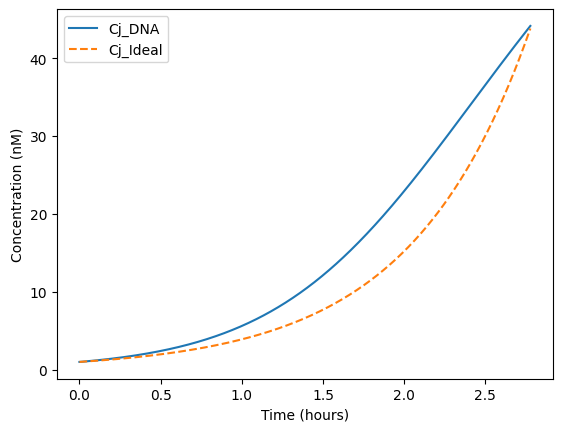

In [6]:
kwargs = {
}
df = plot_file('/Users/rajiv/Desktop/PhD/towardsCatalyticCRNs/peppercorn/uniamp/original/plots/main', 
               x='time', 
               ys=['Cj', 'O1'],
               labels=['Cj_DNA', 'Cj_Ideal'],
               xlabel='Time (hours)',
               ylabel='Concentration (nM)',
               linestyles=['solid', 'dashed'],
               text=r'$C \to C + C$  |  Leaks=No  |  Shadow=No',
               **kwargs)

In [116]:
# kwargs = {
# }
# df = plot_file('/Users/rajiv/Desktop/PhD/towardsCatalyticCRNs/peppercorn/uniamp/original/plots/original', 
#                x='time', 
#                ys=['C', 'O'],
#                labels=['C_DNA', 'C_Ideal'],
#                xlabel='Time (hours)',
#                ylabel='Concentration (nM)',
#                linestyles=['solid', 'dashed'],
#                text=r'$C \to C + C$  |  Leaks=No  |  Shadow=No',
#                **kwargs)

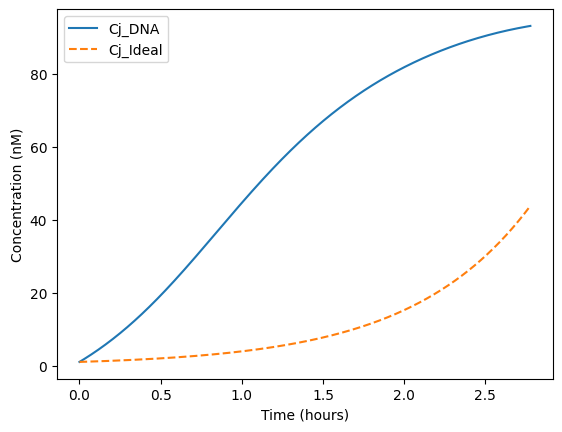

In [117]:
kwargs = {
}
df = plot_file('/Users/rajiv/Desktop/PhD/towardsCatalyticCRNs/peppercorn/uniamp/leaky/plots/leaky', 
               x='time', 
               ys=['Cj', 'O1'],
               labels=['Cj_DNA', 'Cj_Ideal'],
               xlabel='Time (hours)',
               ylabel='Concentration (nM)',
               linestyles=['solid', 'dashed'],
               text=r'$C \to C + C$  |  Leaks=No  |  Shadow=No',
               **kwargs)

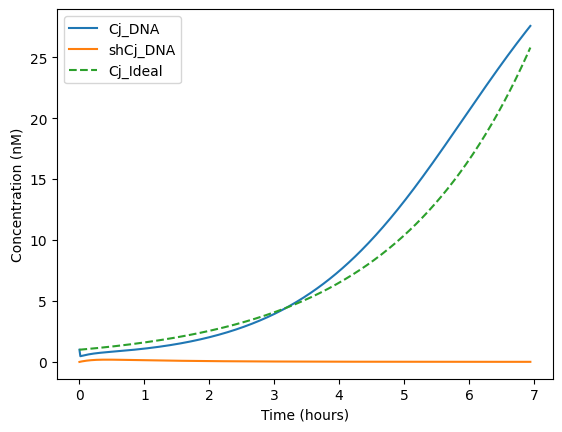

In [118]:
kwargs = {
}
df = plot_file('/Users/rajiv/Desktop/PhD/towardsCatalyticCRNs/peppercorn/uniamp/leaky_shadow/plots/leaky_shadow', 
               x='time', 
               ys=['Cj', 'shCj', 'O1'],
               labels=['Cj_DNA', 'shCj_DNA', 'Cj_Ideal'],
               xlabel='Time (hours)',
               ylabel='Concentration (nM)',
               linestyles=['solid', 'solid', 'dashed'],
               text=r'$C \to C + C$  |  Leaks=No  |  Shadow=No',
               **kwargs)

# Biamp

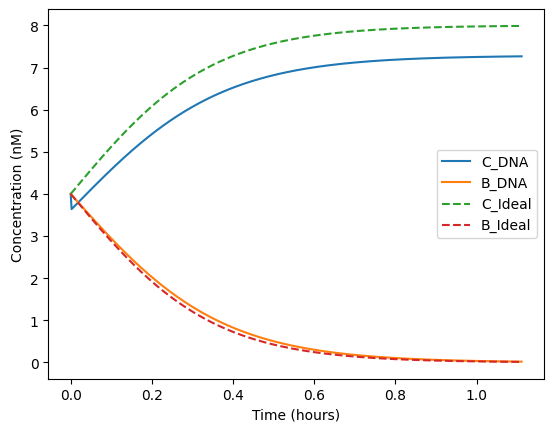

In [119]:
kwargs = {
}
df = plot_file('/Users/rajiv/Desktop/PhD/towardsCatalyticCRNs/peppercorn/biamp/original/plots/original', 
               x='time', 
               ys=['Cj', 'Br', 'O1', 'O2'],
               labels=['C_DNA', 'B_DNA', 'C_Ideal', 'B_Ideal'],
               xlabel='Time (hours)',
               ylabel='Concentration (nM)',
               linestyles=['solid', 'solid', 'dashed', 'dashed'],
               text=r'$C + B \to C + C$  |  Leaks=No  |  Shadow=No',
               **kwargs)

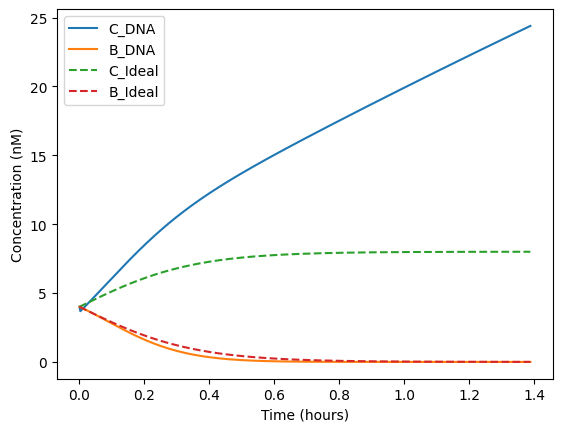

In [120]:
kwargs = {
}
df = plot_file('/Users/rajiv/Desktop/PhD/towardsCatalyticCRNs/peppercorn/biamp/leaky/plots/leaky', 
               x='time', 
               ys=['Cj', 'Br', 'O1', 'O2'],
               labels=['C_DNA', 'B_DNA', 'C_Ideal', 'B_Ideal'],
               xlabel='Time (hours)',
               ylabel='Concentration (nM)',
               linestyles=['solid', 'solid', 'dashed', 'dashed'],
               text=r'$C + B \to C + C$  |  Leaks=No  |  Shadow=No',
               **kwargs)

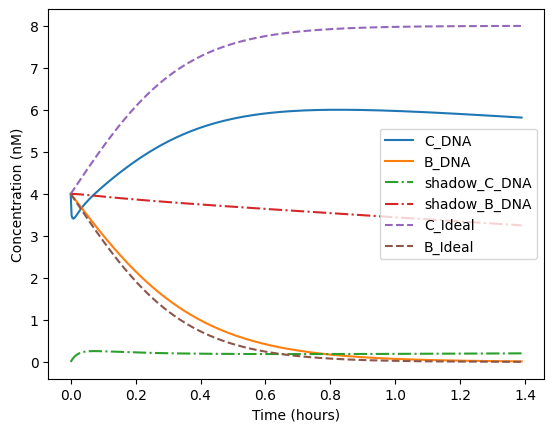

In [121]:
kwargs = {
}
df = plot_file('/Users/rajiv/Desktop/PhD/towardsCatalyticCRNs/peppercorn/biamp/leaky_shadow/plots/leaky_shadow', 
               x='time', 
               ys=['Cj', 'Br', 'shCj', 'shBr', 'O1', 'O2'],
               labels=['C_DNA', 'B_DNA', 'shadow_C_DNA', 'shadow_B_DNA', 'C_Ideal', 'B_Ideal'],
               xlabel='Time (hours)',
               ylabel='Concentration (nM)',
               linestyles=['solid', 'solid', 'dashdot', 'dashdot', 'dashed', 'dashed'],
               text=r'$C + B \to C + C$  |  Leaks=No  |  Shadow=No',
               **kwargs)

# RPS

['time', 'Ap', 'Br', 'Cj', 'Aq', 'Bs', 'Ck', 'HelperCCk']


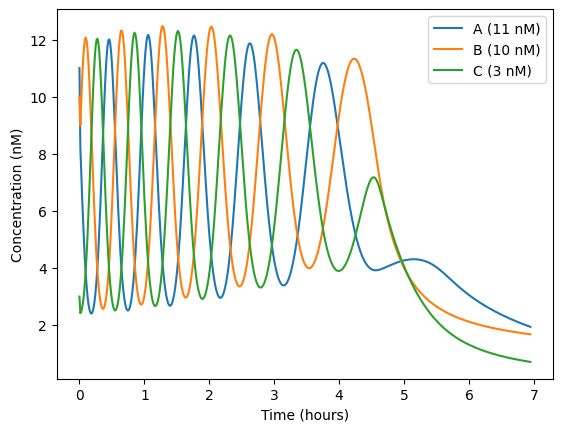

In [24]:
kwargs = {
}
df = plot_file_advanced('/Users/rajiv/Desktop/PhD/towardsCatalyticCRNs/peppercorn/rps/original/plots/original', 
               x='time', 
               ys={
                   'A': ['Ap', 'Aq'],
                   'B': ['Br', 'Bs'],
                   'C': ['Cj', 'Ck'],
               },
               labels=['A (11 nM)', 'B (10 nM)', 'C (3 nM)'],
               xlabel='Time (hours)',
               ylabel='Concentration (nM)',
               linestyles=['solid', 'solid', 'solid'],
               text=r'$C + B \to C + C$  |  Leaks=No  |  Shadow=No',
               **kwargs)

['time', 'Ap', 'Br', 'Cj', 'Aq', 'Bs', 'Ck']


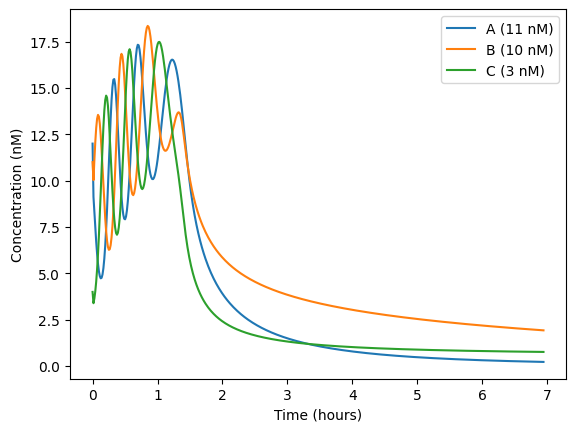

In [25]:
kwargs = {
}
df = plot_file_advanced('/Users/rajiv/Desktop/PhD/towardsCatalyticCRNs/peppercorn/rps/leaky/plots/leaky', 
               x='time', 
               ys={
                   'A': ['Ap', 'Aq'],
                   'B': ['Br', 'Bs'],
                   'C': ['Cj', 'Ck'],
               },
               labels=['A (11 nM)', 'B (10 nM)', 'C (3 nM)'],
               xlabel='Time (hours)',
               ylabel='Concentration (nM)',
               linestyles=['solid', 'solid', 'solid'],
               text=r'$C + B \to C + C$  |  Leaks=No  |  Shadow=No',
               **kwargs)

['time', 'Ap', 'Br', 'Cj', 'Aq', 'Bs', 'Ck']


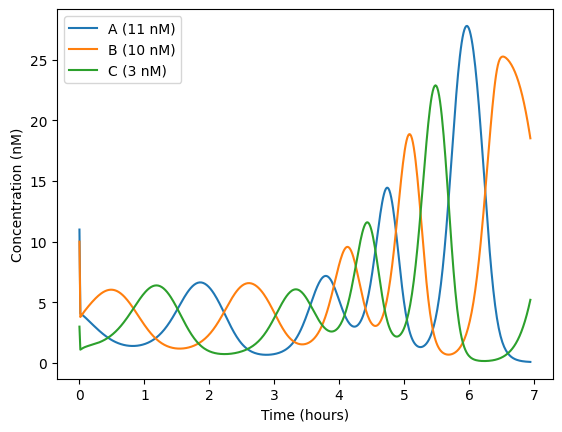

In [70]:
kwargs = {
}
df = plot_file_advanced('/Users/rajiv/Desktop/PhD/towardsCatalyticCRNs/peppercorn/rps/leaky_shadow/plots/leaky_shadow', 
               x='time', 
               ys={
                   'A': ['Ap', 'Aq'],
                   'B': ['Br', 'Bs'],
                   'C': ['Cj', 'Ck'],
               },
               labels=['A (11 nM)', 'B (10 nM)', 'C (3 nM)'],
               xlabel='Time (hours)',
               ylabel='Concentration (nM)',
               linestyles=['solid', 'solid', 'solid'],
               text=r'$C + B \to C + C$  |  Leaks=No  |  Shadow=No',
               **kwargs)

# Consensus

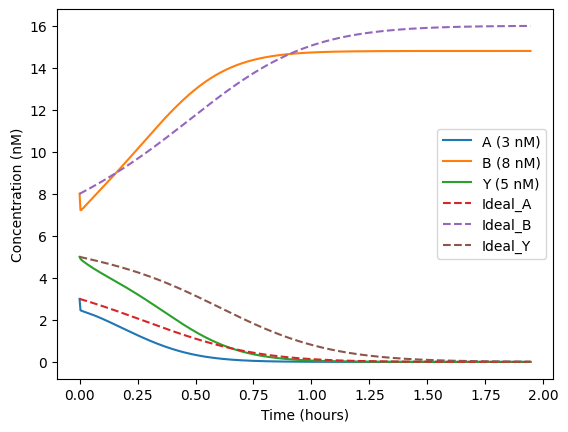

In [80]:
kwargs = {
}
df = plot_file('/Users/rajiv/Desktop/PhD/towardsCatalyticCRNs/peppercorn/con/original/plots/original', 
               x='time', 
               ys=['A', 'B', 'Y', 'OA', 'OB', 'OY'],
               labels=['A (3 nM)', 'B (8 nM)', 'Y (5 nM)', 'Ideal_A', 'Ideal_B', 'Ideal_Y'],
               xlabel='Time (hours)',
               ylabel='Concentration (nM)',
               linestyles=['solid', 'solid', 'solid', 'dashed', 'dashed', 'dashed'],
               text=r'$C + B \to C + C$  |  Leaks=No  |  Shadow=No',
               **kwargs)

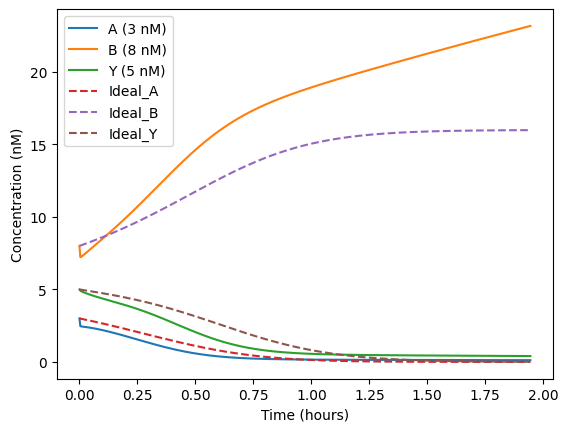

In [81]:
kwargs = {
}
df = plot_file('/Users/rajiv/Desktop/PhD/towardsCatalyticCRNs/peppercorn/con/leaky/plots/leaky', 
               x='time', 
               ys=['A', 'B', 'Y', 'OA', 'OB', 'OY'],
               labels=['A (3 nM)', 'B (8 nM)', 'Y (5 nM)', 'Ideal_A', 'Ideal_B', 'Ideal_Y'],
               xlabel='Time (hours)',
               ylabel='Concentration (nM)',
               linestyles=['solid', 'solid', 'solid', 'dashed', 'dashed', 'dashed'],
               text=r'$C + B \to C + C$  |  Leaks=No  |  Shadow=No',
               **kwargs)

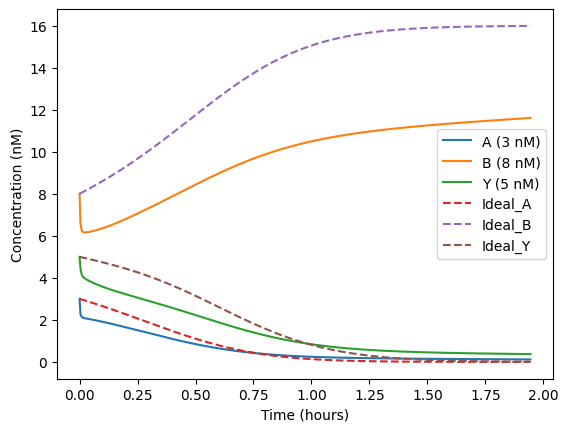

In [82]:
kwargs = {
}
df = plot_file('/Users/rajiv/Desktop/PhD/towardsCatalyticCRNs/peppercorn/con/leaky_shadow/plots/leaky_shadow', 
               x='time', 
               ys=['A', 'B', 'Y', 'OA', 'OB', 'OY'],
               labels=['A (3 nM)', 'B (8 nM)', 'Y (5 nM)', 'Ideal_A', 'Ideal_B', 'Ideal_Y'],
               xlabel='Time (hours)',
               ylabel='Concentration (nM)',
               linestyles=['solid', 'solid', 'solid', 'dashed', 'dashed', 'dashed'],
               text=r'$C + B \to C + C$  |  Leaks=No  |  Shadow=No',
               **kwargs)

# Perturbation

['time', 'Ap', 'Br', 'Cj', 'shAp', 'shBr', 'shCj', 'Aq', 'Bs', 'Ck', 'shAq', 'shBs', 'shCk']


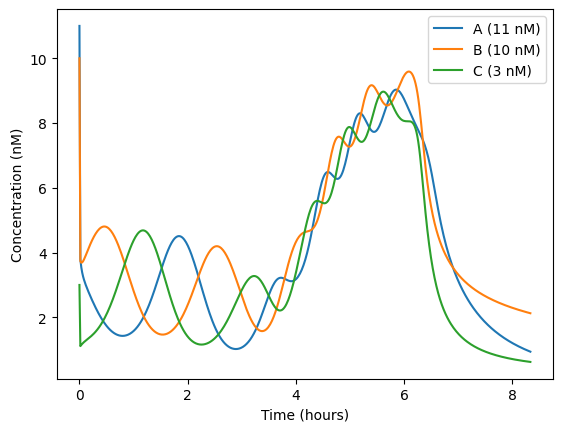

In [89]:
kwargs = {
}
df = plot_file_advanced('/Users/rajiv/Desktop/PhD/towardsCatalyticCRNs/peppercorn/rps/0_5/plots/orig_shadow_pert_cancel', 
               x='time', 
               ys={
                   'A': ['Ap', 'Aq'],
                   'B': ['Br', 'Bs'],
                   'C': ['Cj', 'Ck'],
               },
               labels=['A (11 nM)', 'B (10 nM)', 'C (3 nM)'],
               xlabel='Time (hours)',
               ylabel='Concentration (nM)',
               linestyles=['solid', 'solid', 'solid'],
               text=r'$C + B \to C + C$  |  Leaks=No  |  Shadow=No',
               name='rps_original_shadow_pert-1.5X_cancel',
               **kwargs)

['time', 'Ap', 'Br', 'Cj', 'shAp', 'shBr', 'shCj', 'Aq', 'Bs', 'Ck', 'shAq', 'shBs', 'shCk']


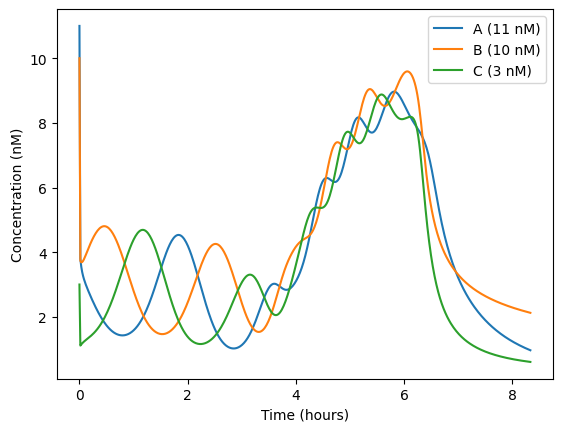

In [76]:
kwargs = {
}
df = plot_file_advanced('/Users/rajiv/Desktop/PhD/towardsCatalyticCRNs/peppercorn/rps/1/plots/orig_shadow_pert_cancel', 
               x='time', 
               ys={
                   'A': ['Ap', 'Aq'],
                   'B': ['Br', 'Bs'],
                   'C': ['Cj', 'Ck'],
               },
               labels=['A (11 nM)', 'B (10 nM)', 'C (3 nM)'],
               xlabel='Time (hours)',
               ylabel='Concentration (nM)',
               linestyles=['solid', 'solid', 'solid'],
               text=r'$C + B \to C + C$  |  Leaks=No  |  Shadow=No',
               name='rps_original_shadow_pert-2X_cancel',
               **kwargs)

['time', 'Ap', 'Br', 'Cj', 'shAp', 'shBr', 'shCj', 'Aq', 'Bs', 'Ck', 'shAq', 'shBs', 'shCk']


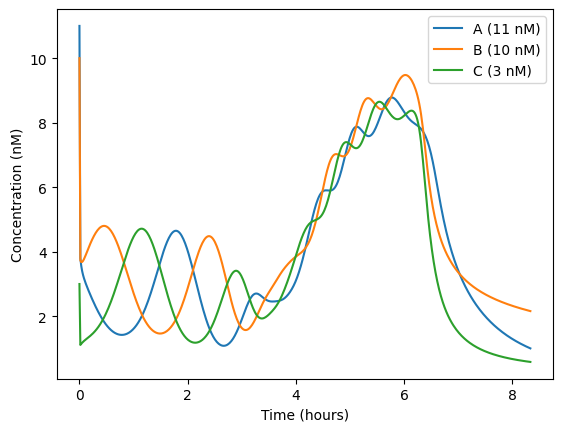

In [77]:
kwargs = {
}
df = plot_file_advanced('/Users/rajiv/Desktop/PhD/towardsCatalyticCRNs/peppercorn/rps/4/plots/orig_shadow_pert_cancel', 
               x='time', 
               ys={
                   'A': ['Ap', 'Aq'],
                   'B': ['Br', 'Bs'],
                   'C': ['Cj', 'Ck'],
               },
               labels=['A (11 nM)', 'B (10 nM)', 'C (3 nM)'],
               xlabel='Time (hours)',
               ylabel='Concentration (nM)',
               linestyles=['solid', 'solid', 'solid'],
               text=r'$C + B \to C + C$  |  Leaks=No  |  Shadow=No',
               name='rps_original_shadow_pert-5X_cancel',
               **kwargs)

['time', 'Ap', 'Br', 'Cj', 'shAp', 'shBr', 'shCj', 'Aq', 'Bs', 'Ck', 'shAq', 'shBs', 'shCk']


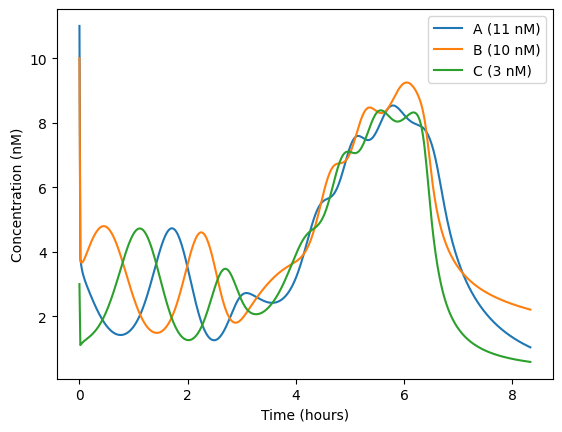

In [78]:
kwargs = {
}
df = plot_file_advanced('/Users/rajiv/Desktop/PhD/towardsCatalyticCRNs/peppercorn/rps/9/plots/orig_shadow_pert_cancel', 
               x='time', 
               ys={
                   'A': ['Ap', 'Aq'],
                   'B': ['Br', 'Bs'],
                   'C': ['Cj', 'Ck'],
               },
               labels=['A (11 nM)', 'B (10 nM)', 'C (3 nM)'],
               xlabel='Time (hours)',
               ylabel='Concentration (nM)',
               linestyles=['solid', 'solid', 'solid'],
               text=r'$C + B \to C + C$  |  Leaks=No  |  Shadow=No',
               name='rps_original_shadow_pert-10X_cancel',
               **kwargs)

# Leaks under Perturbation and Shadow Cancellation

Here, we measure the leak in different cases of Perturbation with and without shadow cancellation. This shows that while in the absence of shadow cancellation the leak is amplified exponentially, in the presence of shadow cancellation, the leak is amplified subexponentially. This can be captured by the behavior of the shadow signal strands. 

['time', 'Ap', 'Br', 'Cj', 'shAp', 'shBr', 'shCj', 'Aq', 'Bs', 'Ck', 'shAq', 'shBs', 'shCk']
['time', 'Ap', 'Br', 'Cj', 'shAp', 'shBr', 'shCj', 'Aq', 'Bs', 'Ck', 'shAq', 'shBs', 'shCk']
['time', 'Ap', 'Br', 'Cj', 'shAp', 'shBr', 'shCj', 'Aq', 'Bs', 'Ck', 'shAq', 'shBs', 'shCk']
['time', 'Ap', 'Br', 'Cj', 'shAp', 'shBr', 'shCj', 'Aq', 'Bs', 'Ck', 'shAq', 'shBs', 'shCk']
['time', 'Ap', 'Br', 'Cj', 'shAp', 'shBr', 'shCj', 'Aq', 'Bs', 'Ck', 'shAq', 'shBs', 'shCk']


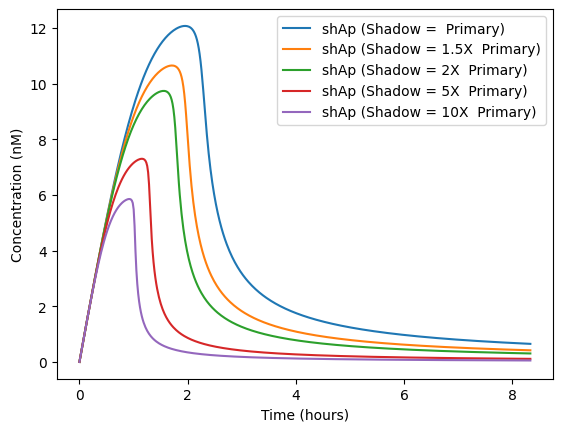

In [79]:
tableau_colors=list(mcolors.TABLEAU_COLORS)
perts = ['0_0', '0_5', '1', '4', '9']
labels = ['', '1.5X ', '2X ', '5X ', '10X ']
dfs_nocancel = []
for index, pert in enumerate(perts):
    kwargs = {
    }
    df = plot_file_advanced(f'/Users/rajiv/Desktop/PhD/towardsCatalyticCRNs/peppercorn/rps/{pert}/plots/orig_shadow_pert_nocancel_zeroconc', 
                   x='time', 
                   ys={
                       'shA': ['shAp', 'shAq']
                   },
                   labels=[f'shAp (Shadow = {labels[index]} Primary)'],
                   xlabel='Time (hours)',
                   ylabel='Concentration (nM)',
                   linestyles=['solid'],
                   colors=[tableau_colors[index]],
                   name='rps_orig_shadow_pert_nocancel_zeroconc',
                   text=r'$C + B \to C + C$  |  Leaks=No  |  Shadow=No',
                   **kwargs)
    dfs_nocancel.append(df)

['time', 'Ap', 'Br', 'Cj', 'shAp', 'shBr', 'shCj', 'Aq', 'Bs', 'Ck', 'shAq', 'shBs', 'shCk']
['time', 'Ap', 'Br', 'Cj', 'shAp', 'shBr', 'shCj', 'Aq', 'Bs', 'Ck', 'shAq', 'shBs', 'shCk']
['time', 'Ap', 'Br', 'Cj', 'shAp', 'shBr', 'shCj', 'Aq', 'Bs', 'Ck', 'shAq', 'shBs', 'shCk']
['time', 'Ap', 'Br', 'Cj', 'shAp', 'shBr', 'shCj', 'Aq', 'Bs', 'Ck', 'shAq', 'shBs', 'shCk']
['time', 'Ap', 'Br', 'Cj', 'shAp', 'shBr', 'shCj', 'Aq', 'Bs', 'Ck', 'shAq', 'shBs', 'shCk']


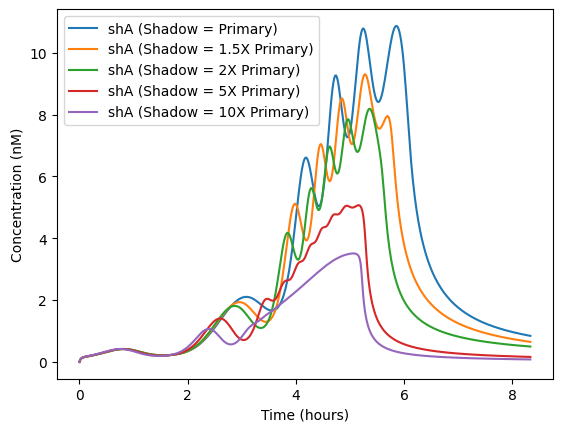

In [80]:
tableau_colors=list(mcolors.TABLEAU_COLORS)
perts = ['0_0', '0_5', '1', '4', '9']
labels = ['', '1.5X ', '2X ', '5X ', '10X ']
dfs_cancel = []
for index, pert in enumerate(perts):
    kwargs = {
    }
    df = plot_file_advanced(f'/Users/rajiv/Desktop/PhD/towardsCatalyticCRNs/peppercorn/rps/{pert}/plots/orig_shadow_pert_cancel_zeroconc', 
                   x='time', 
                   ys={
                       'shA': ['shAp', 'shAq']
                   },
                   labels=[f'shA (Shadow = {labels[index]}Primary)'],
                   xlabel='Time (hours)',
                   ylabel='Concentration (nM)',
                   linestyles=['solid'],
                   colors=[tableau_colors[index]],
                   name=f'rps_orig_shadow_pert_cancel_zeroconc',
                   text=r'$C + B \to C + C$  |  Leaks=No  |  Shadow=No',
                   **kwargs)
    dfs_cancel.append(df)

## Plot combined

['time', 'Ap', 'Br', 'Cj', 'shAp', 'shBr', 'shCj', 'Aq', 'Bs', 'Ck', 'shAq', 'shBs', 'shCk']
['time', 'Ap', 'Br', 'Cj', 'shAp', 'shBr', 'shCj', 'Aq', 'Bs', 'Ck', 'shAq', 'shBs', 'shCk']
['time', 'Ap', 'Br', 'Cj', 'shAp', 'shBr', 'shCj', 'Aq', 'Bs', 'Ck', 'shAq', 'shBs', 'shCk']
['time', 'Ap', 'Br', 'Cj', 'shAp', 'shBr', 'shCj', 'Aq', 'Bs', 'Ck', 'shAq', 'shBs', 'shCk']
['time', 'Ap', 'Br', 'Cj', 'shAp', 'shBr', 'shCj', 'Aq', 'Bs', 'Ck', 'shAq', 'shBs', 'shCk']
['time', 'Ap', 'Br', 'Cj', 'shAp', 'shBr', 'shCj', 'Aq', 'Bs', 'Ck', 'shAq', 'shBs', 'shCk']
['time', 'Ap', 'Br', 'Cj', 'shAp', 'shBr', 'shCj', 'Aq', 'Bs', 'Ck', 'shAq', 'shBs', 'shCk']
['time', 'Ap', 'Br', 'Cj', 'shAp', 'shBr', 'shCj', 'Aq', 'Bs', 'Ck', 'shAq', 'shBs', 'shCk']
['time', 'Ap', 'Br', 'Cj', 'shAp', 'shBr', 'shCj', 'Aq', 'Bs', 'Ck', 'shAq', 'shBs', 'shCk']
['time', 'Ap', 'Br', 'Cj', 'shAp', 'shBr', 'shCj', 'Aq', 'Bs', 'Ck', 'shAq', 'shBs', 'shCk']


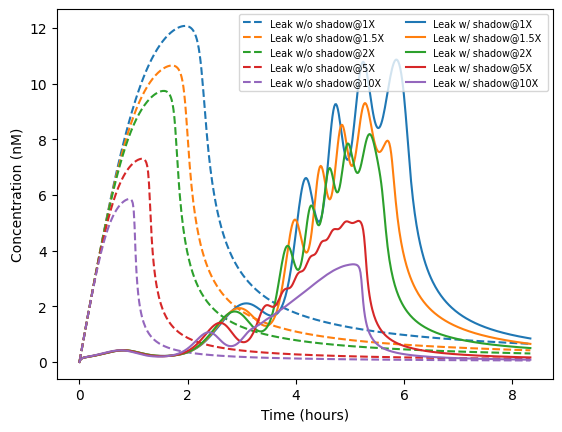

In [81]:
tableau_colors=list(mcolors.TABLEAU_COLORS)
perts = ['0_0', '0_5', '1', '4', '9']
labels = ['1X', '1.5X ', '2X ', '5X ', '10X ']
legendkwargs = {'ncols': 2, 'loc':'upper right', 'fontsize':'x-small'}
for index, pert in enumerate(perts):
    kwargs = {
    }
    df = plot_file_advanced(f'/Users/rajiv/Desktop/PhD/towardsCatalyticCRNs/peppercorn/rps/{pert}/plots/orig_shadow_pert_nocancel_zeroconc', 
                   x='time', 
                   ys={
                       'shA': ['shAp', 'shAq']
                   },
                   labels=[f'Leak w/o shadow@{labels[index]}'],
                   xlabel='Time (hours)',
                   ylabel='Concentration (nM)',
                   linestyles=['dashed'],
                   colors=[tableau_colors[index]],
                   name='rps_orig_shadow_pert_nocancel_cancel_combined',
                   text=r'$C + B \to C + C$  |  Leaks=No  |  Shadow=No',
                   legendkwargs=legendkwargs,
                   **kwargs)
for index, pert in enumerate(perts):
    kwargs={}
    df = plot_file_advanced(f'/Users/rajiv/Desktop/PhD/towardsCatalyticCRNs/peppercorn/rps/{pert}/plots/orig_shadow_pert_cancel_zeroconc', 
                   x='time', 
                   ys={
                       'shA': ['shAp', 'shAq']
                   },
                   labels=[f'Leak w/ shadow@{labels[index]}'],
                   xlabel='Time (hours)',
                   ylabel='Concentration (nM)',
                   linestyles=['solid'],
                   colors=[tableau_colors[index]],
                   name=f'rps_orig_shadow_pert_nocancel_cancel_combined',
                   text=r'$C + B \to C + C$  |  Leaks=No  |  Shadow=No',
                   legendkwargs=legendkwargs,
                   **kwargs)

###  At a particular perturbation plot all the three species

['time', 'Ap', 'Br', 'Cj', 'shAp', 'shBr', 'shCj', 'Aq', 'Bs', 'Ck', 'shAq', 'shBs', 'shCk']
['time', 'Ap', 'Br', 'Cj', 'shAp', 'shBr', 'shCj', 'Aq', 'Bs', 'Ck', 'shAq', 'shBs', 'shCk']


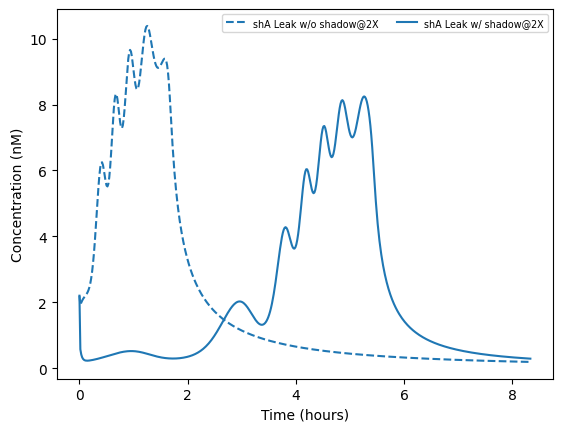

In [88]:
tableau_colors=list(mcolors.TABLEAU_COLORS)
perts = ['1']
labels = ['2X']
legendkwargs = {'ncols': 2, 'loc':'upper right', 'fontsize':'x-small'}

X = 'time'
Ys = {
        'shA': ['shAp', 'shAq']
     }

for index, pert in enumerate(perts):
    kwargs = {
    }
    df = plot_file_advanced(f'/Users/rajiv/Desktop/PhD/towardsCatalyticCRNs/peppercorn/rps/{pert}/plots/orig_shadow_pert_nocancel', 
                   x='time', 
                   ys=Ys,
                   labels=[f'{y} Leak w/o shadow@{labels[index]}' for y in Ys ],
                   xlabel='Time (hours)',
                   ylabel='Concentration (nM)',
                   linestyles=['dashed' for y in Ys],
                   colors=tableau_colors[index:index+len(Ys)],
                   name=f'rps_orig_shadow_pert_nocancel_{labels[index]}',
                   text=r'$C + B \to C + C$  |  Leaks=No  |  Shadow=No',
                   legendkwargs=legendkwargs,
                   **kwargs)

for index, pert in enumerate(perts):
    kwargs = {
    }
    df = plot_file_advanced(f'/Users/rajiv/Desktop/PhD/towardsCatalyticCRNs/peppercorn/rps/{pert}/plots/orig_shadow_pert_cancel', 
                   x='time', 
                   ys=Ys,
                   labels=[f'{y} Leak w/ shadow@{labels[index]}' for y in Ys ],
                   xlabel='Time (hours)',
                   ylabel='Concentration (nM)',
                   linestyles=['solid' for y in Ys],
                   colors=tableau_colors[index:index+len(Ys)],
                   name=f'rps_orig_shadow_pert_cancel_{labels[index]}',
                   text=r'$C + B \to C + C$  |  Leaks=No  |  Shadow=No',
                   legendkwargs=legendkwargs,
                   **kwargs)

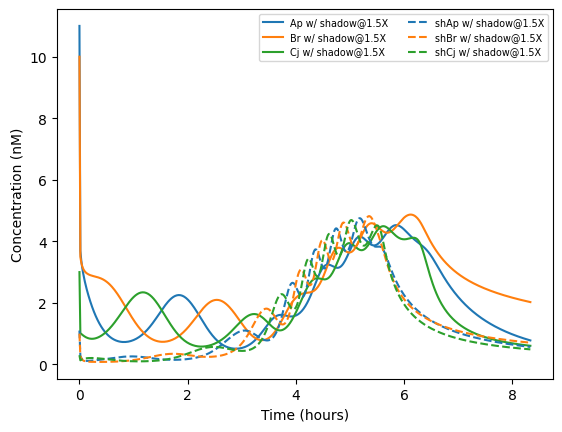

In [87]:
tableau_colors=list(mcolors.TABLEAU_COLORS)
perts = ['0_5']
labels = ['1.5X']
legendkwargs = {'ncols': 2, 'loc':'upper right', 'fontsize':'x-small'}

X = 'time'
Ys = ['Ap', 'Br', 'Cj', 'shAp', 'shBr', 'shCj']
for index, pert in enumerate(perts):
    kwargs = {
    }
    df = plot_file(f'/Users/rajiv/Desktop/PhD/towardsCatalyticCRNs/peppercorn/rps/{pert}/plots/orig_shadow_pert_cancel', 
                   x='time', 
                   ys=Ys,
                   labels=[f'{y} w/ shadow@{labels[index]}' for y in Ys ],
                   xlabel='Time (hours)',
                   ylabel='Concentration (nM)',
                   linestyles=['solid' for y in Ys[:3]] + ['dashed' for y in Ys[3:]], 
                   colors=tableau_colors[index:index+len(Ys)//2]*2,
                   name=f'rps_orig_shadow_pert_cancel_{labels[index]}_withprimary',
                   text=r'$C + B \to C + C$  |  Leaks=No  |  Shadow=No',
                   legendkwargs=legendkwargs,
                   **kwargs)

# Catalysis, Annihilation, and Degradation

ValueError: 'O1' is neither a data key nor a valid format string (unrecognized character 'O')

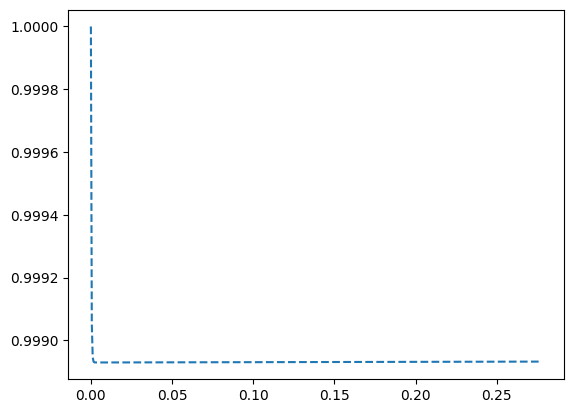

In [70]:
kwargs = {
}
df = plot_file('/Users/rajiv/Desktop/PhD/towardsCatalyticCRNs/peppercorn/control_v2/original/plots/r1_cat', 
               x='time', 
               ys=['X1', 'O1', 'X2', 'O2'],
               labels=['X_DNA (1 nM)', 'X_Ideal (1 nM)', 'Y_DNA (0 nM)', 'Y_Ideal (0 nM)'],
               xlabel='Time (hours)',
               ylabel='Concentration (nM)',
               linestyles=['dashed', 'dashed', 'solid', 'solid'],
               text=r'$C + B \to C + C$  |  Leaks=No  |  Shadow=No',
               **kwargs)

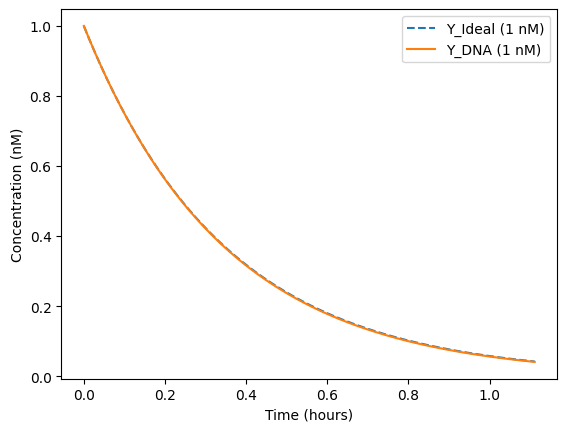

In [71]:
kwargs = {
}
df = plot_file('/Users/rajiv/Desktop/PhD/towardsCatalyticCRNs/peppercorn/control_v2/original/plots/r4_deg', 
               x='time', 
               ys=['X1', 'O1'],
               labels=['Y_Ideal (1 nM)', 'Y_DNA (1 nM)'],
               xlabel='Time (hours)',
               ylabel='Concentration (nM)',
               linestyles=['dashed', 'solid'],
               text=r'$C + B \to C + C$  |  Leaks=No  |  Shadow=No',
               **kwargs)

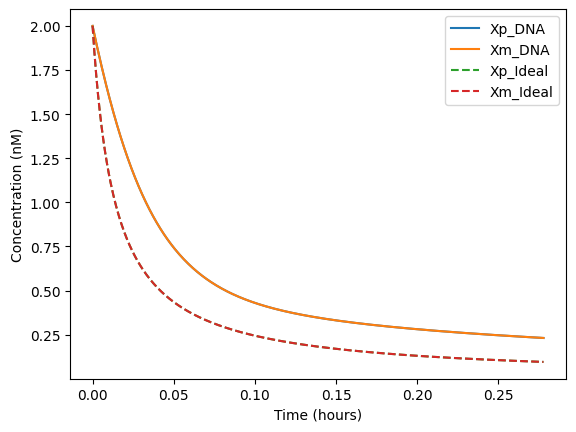

In [72]:
kwargs = {
}
df = plot_file('/Users/rajiv/Desktop/PhD/towardsCatalyticCRNs/peppercorn/control_v2/original/plots/r11_ann', 
               x='time', 
               ys=['X1', 'X2', 'O1', 'O2'],
               labels=['Xp_DNA', 'Xm_DNA', 'Xp_Ideal', 'Xm_Ideal'],
               xlabel='Time (hours)',
               ylabel='Concentration (nM)',
               linestyles=['solid', 'solid', 'dashed', 'dashed'],
               text=r'$C + B \to C + C$  |  Leaks=No  |  Shadow=No',
               **kwargs)

# Control

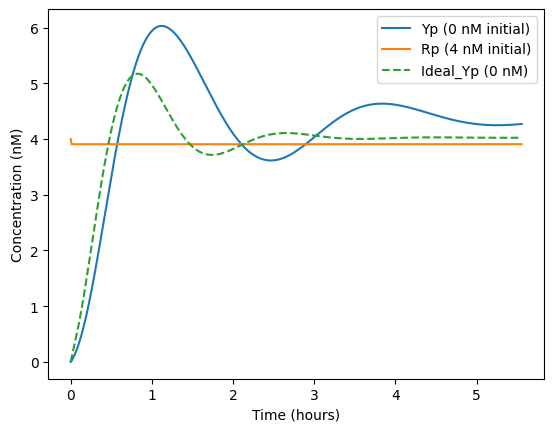

In [19]:
kwargs = {
}
df = plot_file('/Users/rajiv/Desktop/PhD/towardsCatalyticCRNs/peppercorn/control_v2/original/plots/ideal', 
               x='time', 
               ys=['Yp', 'Rp', 'Ideal_Yp'],
               labels=['Yp (0 nM initial)', 'Rp (4 nM initial)', 'Ideal_Yp (0 nM)'],
               xlabel='Time (hours)',
               ylabel='Concentration (nM)',
               linestyles=['solid', 'solid', 'dashed'],
               text=r'$C + B \to C + C$  |  Leaks=No  |  Shadow=No',
               **kwargs)

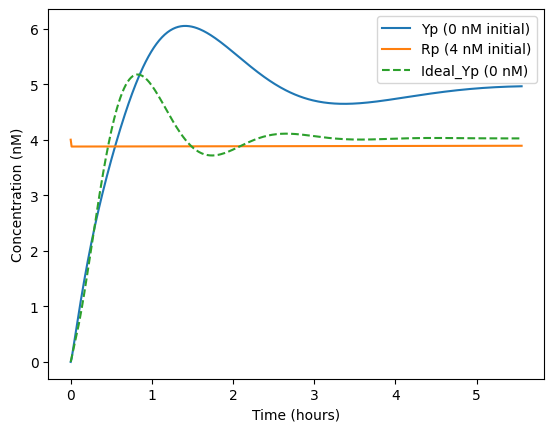

In [17]:
kwargs = {
}
df = plot_file('/Users/rajiv/Desktop/PhD/towardsCatalyticCRNs/peppercorn/control_v2/original/plots/ideal_leaky', 
               x='time', 
               ys=['Yp', 'Rp', 'Ideal_Yp'],
               labels=['Yp (0 nM initial)', 'Rp (4 nM initial)', 'Ideal_Yp (0 nM)'],
               xlabel='Time (hours)',
               ylabel='Concentration (nM)',
               linestyles=['solid', 'solid', 'dashed'],
               text=r'$C + B \to C + C$  |  Leaks=No  |  Shadow=No',
               **kwargs)

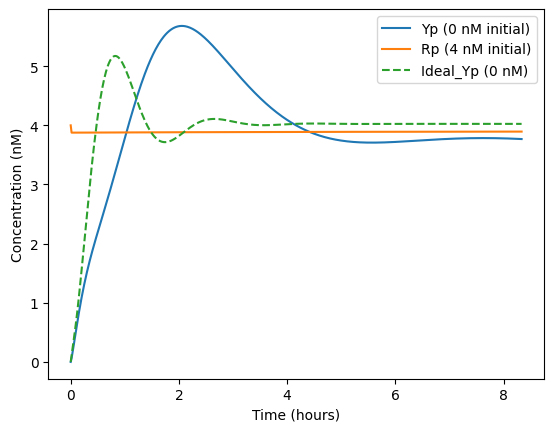

In [18]:
kwargs = {
}
df = plot_file('/Users/rajiv/Desktop/PhD/towardsCatalyticCRNs/peppercorn/control_v2/original/plots/ideal_leaky_shadow', 
               x='time', 
               ys=['Yp', 'Rp', 'Ideal_Yp'],
               labels=['Yp (0 nM initial)', 'Rp (4 nM initial)', 'Ideal_Yp (0 nM)'],
               xlabel='Time (hours)',
               ylabel='Concentration (nM)',
               linestyles=['solid', 'solid', 'dashed'],
               text=r'$C + B \to C + C$  |  Leaks=No  |  Shadow=No',
               **kwargs)

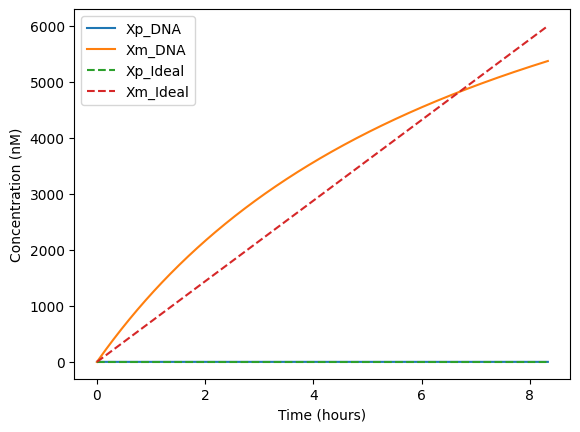

In [40]:
kwargs = {
}
df = plot_file('/Users/rajiv/Desktop/PhD/towardsCatalyticCRNs/peppercorn/control_v2/original/plots/r8_prod', 
               x='time', 
               ys=['X1', 'X2', 'O1', 'O2'],
               labels=['Xp_DNA', 'Xm_DNA', 'Xp_Ideal', 'Xm_Ideal'],
               xlabel='Time (hours)',
               ylabel='Concentration (nM)',
               linestyles=['solid', 'solid', 'dashed', 'dashed'],
               text=r'$C + B \to C + C$  |  Leaks=No  |  Shadow=No',
               **kwargs)

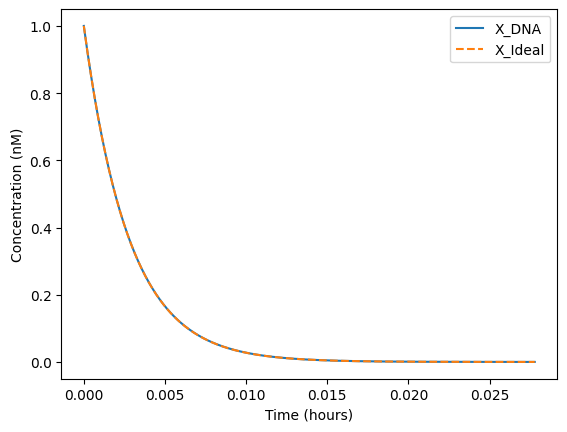

In [41]:
kwargs = {
}
df = plot_file('/Users/rajiv/Desktop/PhD/towardsCatalyticCRNs/peppercorn/control_v2/original/plots/r9_cons', 
               x='time', 
               ys=['X1', 'O1'],
               labels=['X_DNA', 'X_Ideal'],
               xlabel='Time (hours)',
               ylabel='Concentration (nM)',
               linestyles=['solid', 'dashed'],
               text=r'$C + B \to C + C$  |  Leaks=No  |  Shadow=No',
               **kwargs)

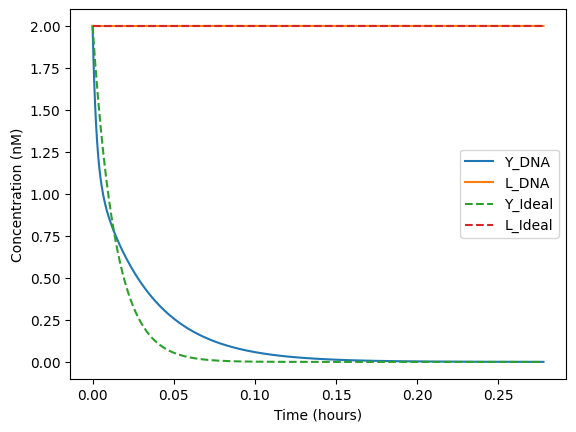

In [42]:
kwargs = {
}
df = plot_file('/Users/rajiv/Desktop/PhD/towardsCatalyticCRNs/peppercorn/control_v2/original/plots/r10_load', 
               x='time', 
               ys=['X1', 'X2', 'O1', 'O2'],
               labels=['Y_DNA', 'L_DNA', 'Y_Ideal', 'L_Ideal'],
               xlabel='Time (hours)',
               ylabel='Concentration (nM)',
               linestyles=['solid', 'solid', 'dashed', 'dashed'],
               text=r'$C + B \to C + C$  |  Leaks=No  |  Shadow=No',
               **kwargs)